In [24]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [25]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


# **`Reading the data & creating a dataframe`**

In [26]:
Columns = ["x1", "x2", "Label"]
Perceptron_text = pd.read_csv("/gdrive/MyDrive/Pattern_Recognition/Perceptron/train-perceptron.txt", dtype=float, header=None, sep=" ", names=Columns)
Perceptron_text

,x1,x2,Label
0,1.0,1.0,1.0
1,1.0,-1.0,1.0
2,2.0,2.5,2.0
3,0.0,2.0,2.0
4,2.0,3.0,2.0
5,4.0,5.0,1.0


# **`Unique labels`**

In [27]:
Unique_labels = np.unique(np.array(Perceptron_text["Label"]))
Unique_labels

array([1., 2.])

# **`Plotting the data points`**

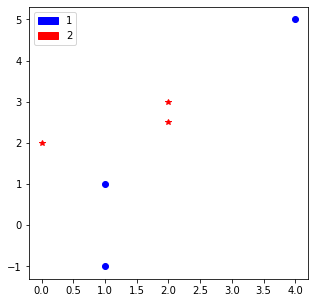

In [28]:
import matplotlib.patches as mpatches

plt.figure(figsize=(5,5))

for i in range(len(Perceptron_text)):
  if Perceptron_text.loc[i]["Label"] == 1.0:
    plt.plot(Perceptron_text.loc[i]["x1"], Perceptron_text.loc[i]["x2"], "bo")
  else:
    plt.plot(Perceptron_text.loc[i]["x1"], Perceptron_text.loc[i]["x2"], "r*")

one = mpatches.Patch(color='blue', label='1')
two = mpatches.Patch(color='red', label='2')
plt.legend(handles=[one, two])

plt.show()

# **`Second order polynomial discriminant function`**

In [29]:
Y = []

for i in range(len(Perceptron_text)):
  x1 = Perceptron_text.loc[i]["x1"]
  x2 = Perceptron_text.loc[i]["x2"]
  temp = []
  temp.extend([x1**2, x2**2, x1*x2, x1, x2, 1])
  Y.append(temp)


# **`Normalization`**

In [30]:
for i in range(len(Perceptron_text)):
  if Perceptron_text.loc[i]["Label"] == 2.0:
    Y[i] = list(np.array(Y[i])*-1)

# **`Activition with weight`**

In [31]:
def Activation(Perceptron_text, Weight):
  Result = []   
  for i in range(len(Perceptron_text)):
    Result.append( np.sum(np.array(Y[i])*Weight) )
  return Result

# **`Check misclassification`**

In [32]:
def Check_misclassification(Result):
  for i in range(len(Result)):
    if Result[i] <= 0:
      return 1
  return 0

# **`Finding the misclassified label indexes`**

In [33]:
def Misclassified_Indexes(Result):
  Misclassified = []
  for i in range(len(Result)):
    if Result[i] <= 0:
      Misclassified.append(i)
  return Misclassified

# **`Weight Update`**

In [34]:
def Weight_update(Misclassified, learning_rate, Y, Previous_Weight):
  Error = np.zeros((1,6), dtype=float)
  for i in range(len(Misclassified)):
    Error = Error + np.array(Y[Misclassified[i]])
  return Previous_Weight + (Error*learning_rate)

# **`Total Batch Perceptron`**

In [35]:
def Batch_perceptron(perceptron_text, learning_rate, Weight, Batch_update):

  classified_flag = 0
  iteration_number = 0

  while classified_flag != 1:
    iteration_number = iteration_number + 1
    Result = Activation(Perceptron_text, Weight)  
    if Check_misclassification(Result) == 1:
      Misclassified = Misclassified_Indexes(Result)
      Weight = Weight_update(Misclassified, learning_rate, Y, Weight)
    else:
      classified_flag = 1
      Batch_update[str(learning_rate)] = iteration_number

# **`Passing different learning rates & checking the batch perceptron iterartions`**

In [36]:
def Pass_Batch_Weight(Weight, Batch_update): 
  # learning rate from 0.1 - 1.0  
  learning_rate = 0.1
  while learning_rate <= 1.:
    Batch_perceptron(Perceptron_text, learning_rate, Weight, Batch_update)
    learning_rate = round(learning_rate + 0.1,2)

# **`Single Perceptron`**

In [37]:
def Single_perceptron(Perceptron_text, Weight, learning_rate, Single_update):

  classified_flag = 0
  iteration_number = 0

  while classified_flag != 1:
    
    iteration_number = iteration_number + 1
    correctly_classified = len(Perceptron_text)

    for i in range(len(Perceptron_text)):
      Result = np.sum(np.array(Y[i])*Weight)
      
      if Result <= 0:
        correctly_classified = correctly_classified - 1
        Weight = Weight + np.array(Y[i])*learning_rate
    
    if correctly_classified == len(Perceptron_text):
      classified_flag = 1
  
  Single_update[str(learning_rate)] = iteration_number


# **`Passing different learning rates & checking the single perceptron iterartions`**

In [38]:
def Pass_Single_Weight(Weight, Single_update): 
  learning_rate = 0.1
  while learning_rate <= 1.0:
    Single_perceptron(Perceptron_text, Weight, learning_rate, Single_update)
    learning_rate = round(learning_rate + 0.1,2)

# **`Plot bar`**

In [39]:
def Plot_bar(Batch_weight, Single_weight, suffix):
  
  plt.subplots(figsize=(20,10))
  bar_width = 0.4

  rates = list(Batch_weight.keys())
  batch_iters = list(Batch_weight.values())
  single_iters = list(Single_weight.values())

  bar1 = np.arange(len(single_iters))
  bar2 = [x+bar_width for x in bar1]

  plt.bar(bar1, single_iters, width = bar_width, color = "red")
  plt.bar(bar2, batch_iters, width = bar_width, color = "blue")

  plt.title(f"Perceptron comparison for {suffix}", fontsize = 20)
  plt.xlabel("Learning rate", fontsize = 15)
  plt.ylabel("No. of iterations", fontsize = 15)
  
  plt.xticks([r+bar_width/2 for r in range(len(single_iters))], rates, rotation = 90)
  
  many = mpatches.Patch(color='blue', label='Many at a time')
  one = mpatches.Patch(color='red', label='One at a time')
  
  plt.legend(handles=[many, one])
  plt.show()

# **`Viewing performance in DataFrame`**

In [40]:
def View_DataFrame(Single_update, Batch_update):
  Rates = list()
  [Rates.append(round(i+0.1, 2)) for i in np.arange(0.0, 1.0, 0.1)]

  Single = list(Single_update.values()) 
  Batch = list(Batch_update.values()) 

  view_data = {
      "Alpha ( Learning rate ) " : Rates,
      "One at a Time" : Single,
      "Many at a Time" : Batch
  }

  viewframe = pd.DataFrame(data = view_data, index=None)
  return viewframe

# **`Passing Weight vector all Zero`**

In [41]:
# Zero Weight
Weight_zeros = np.zeros((1,6), dtype = float)

Batch_update_zero_weight = dict()
Pass_Batch_Weight(Weight_zeros, Batch_update_zero_weight)

Single_update_zero_weight = dict()
Pass_Single_Weight(Weight_zeros, Single_update_zero_weight)

View_DataFrame(Single_update_zero_weight, Batch_update_zero_weight)

,Alpha ( Learning rate ),One at a Time,Many at a Time
0,0.1,141,105
1,0.2,141,105
2,0.3,141,105
3,0.4,141,105
4,0.5,141,92
5,0.6,141,105
6,0.7,141,92
7,0.8,141,105
8,0.9,141,105
9,1.0,141,92


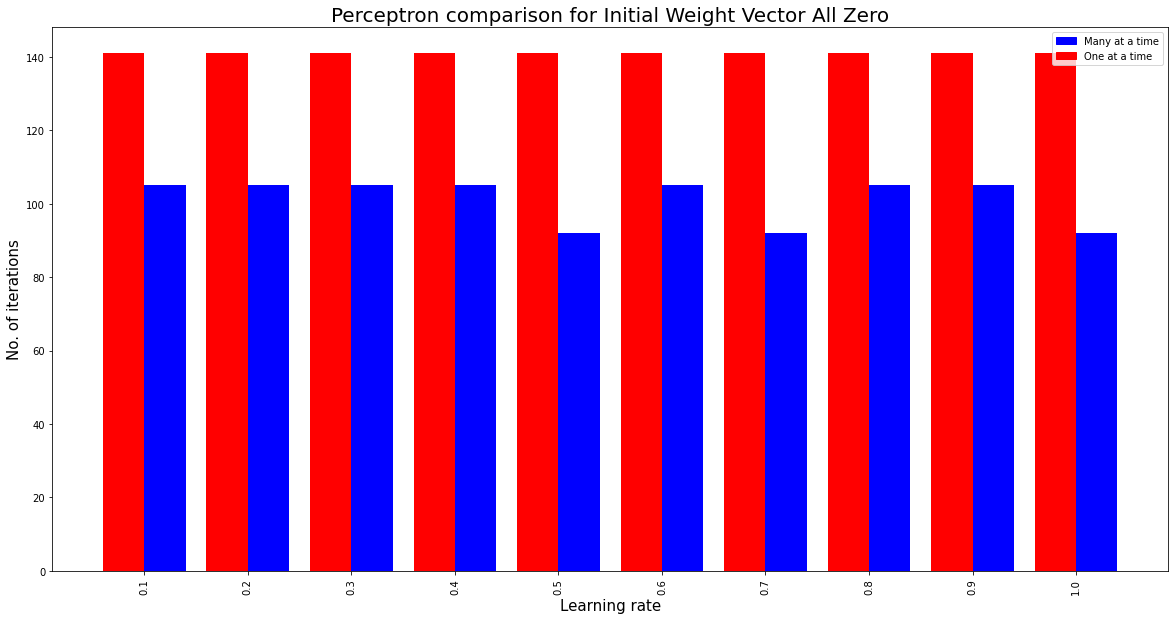

In [42]:
Plot_bar(Batch_update_zero_weight, Single_update_zero_weight, "Initial Weight Vector All Zero")

# **`Passing weight vector all ones`**

In [43]:
# One Weight
Weight_ones = np.ones((1,6), dtype=float)

Batch_update_one_weight = dict()
Pass_Batch_Weight(Weight_ones, Batch_update_one_weight)

Single_update_one_weight = dict()
Pass_Single_Weight(Weight_ones, Single_update_one_weight)

View_DataFrame(Single_update_one_weight, Batch_update_one_weight)

,Alpha ( Learning rate ),One at a Time,Many at a Time
0,0.1,6,102
1,0.2,147,104
2,0.3,149,91
3,0.4,149,116
4,0.5,141,105
5,0.6,157,114
6,0.7,136,91
7,0.8,136,91
8,0.9,140,105
9,1.0,141,93


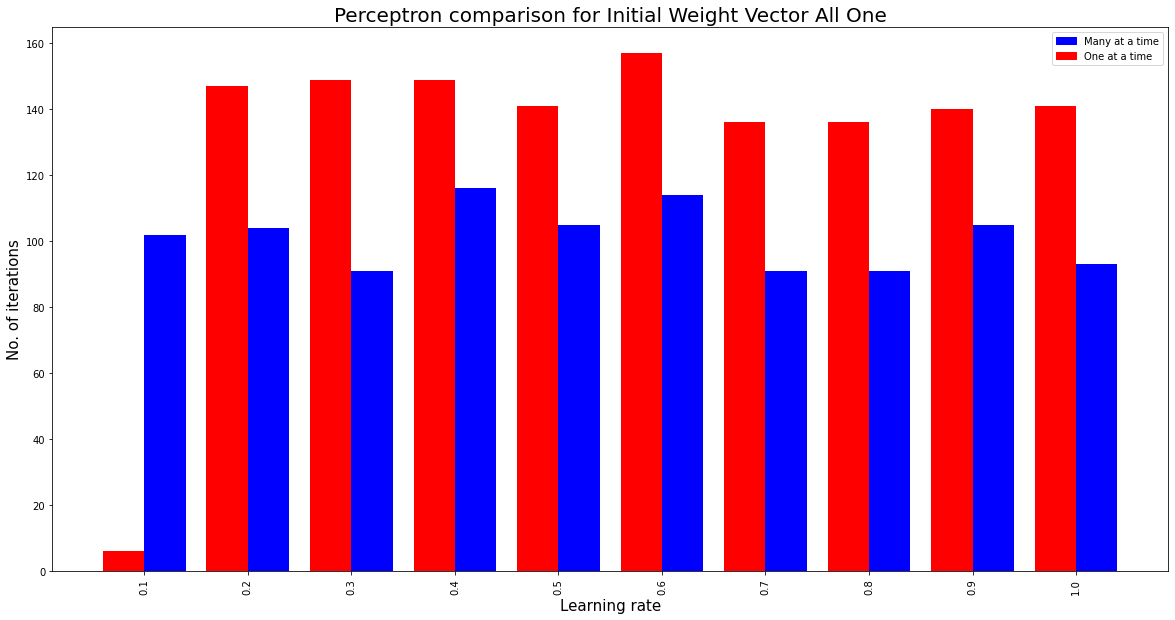

In [44]:
Plot_bar(Batch_update_one_weight, Single_update_one_weight, "Initial Weight Vector All One")

# **`Passing random weights to the weight vector`**

In [45]:
# Random Weight
np.random.seed(53)
Weight_random = np.random.random((1,6))

Batch_update_random_weight = dict()
Pass_Batch_Weight(Weight_random, Batch_update_random_weight)

Single_update_random_weight = dict()
Pass_Single_Weight(Weight_random, Single_update_random_weight)

View_DataFrame(Single_update_random_weight, Batch_update_random_weight)

,Alpha ( Learning rate ),One at a Time,Many at a Time
0,0.1,140,99
1,0.2,136,101
2,0.3,154,87
3,0.4,136,91
4,0.5,140,105
5,0.6,140,122
6,0.7,150,105
7,0.8,149,106
8,0.9,157,88
9,1.0,157,101


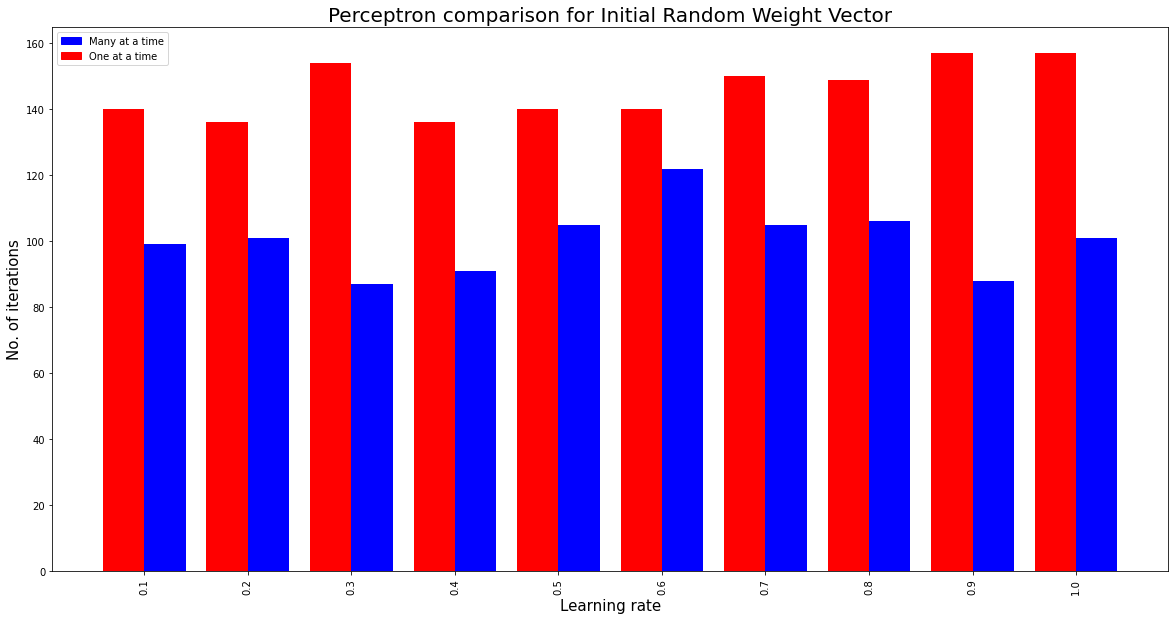

In [46]:
Plot_bar(Batch_update_random_weight, Single_update_random_weight, "Initial Random Weight Vector")